In [1]:
    
import mlModel as ml

    
model, y_scaler = ml.loadMLmodel()
# summarize the model
print("summarize the model")
model.summary()



2023-09-15 16:54:25.241324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ParaView/ParaView-5.8.1-MPI-Linux-Python3.7-64bit/lib
2023-09-15 16:54:25.241416: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-15 16:54:34.710767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-15 16:54:34.720139: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ParaView/ParaView-5.8.1-MPI-Linux-Python3.7-64bit/lib
2023-09-

summarize the model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_0_6891521881 (Conv2D  (None, 129, 384, 128)    6400      
 )                                                               
                                                                 
 max_pooling_0_6891521881 (M  (None, 65, 192, 128)     0         
 axPooling2D)                                                    
                                                                 
 conv2d_1_6891521881 (Conv2D  (None, 65, 192, 128)     802944    
 )                                                               
                                                                 
 max_pooling_1_6891521881 (M  (None, 33, 96, 128)      0         
 axPooling2D)                                                    
                                                                 
 conv2d_2_6891521881 (Conv2D  (None,

/home/ws/vo8312/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
# summarize filter shapes
for layer in model.layers:
 # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_0_6891521881 (7, 7, 1, 128)
conv2d_1_6891521881 (7, 7, 128, 128)
conv2d_2_6891521881 (7, 7, 128, 128)
conv2d_3_6891521881 (7, 7, 128, 128)
conv2d_4_6891521881 (7, 7, 128, 128)


In [5]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model.layers #Conv layers at 0, 2, 4, 6, 8
filters, biases = model.layers[0].get_weights()
print(layer[0].name, filters.shape)


conv2d_0_6891521881 (7, 7, 1, 128)


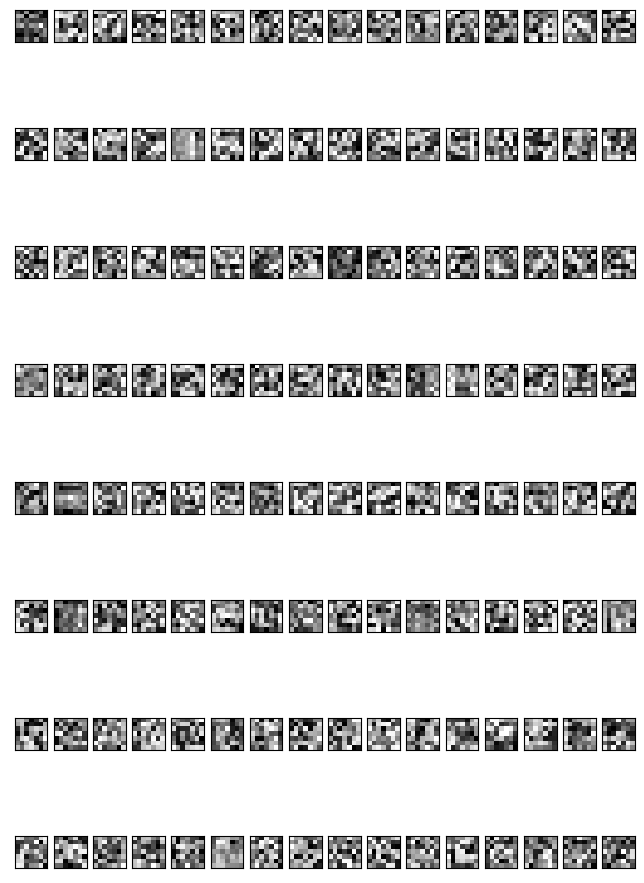

In [6]:
# plot filters
from matplotlib import pyplot as plt

fig1=plt.figure(figsize=(8, 12))
columns = 16
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

In [7]:

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

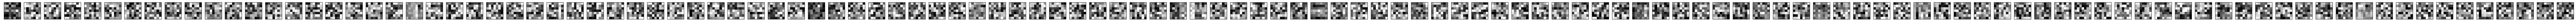

In [8]:
# plot filters
from matplotlib import pyplot as plt

fig1=plt.figure(figsize=(128, 128))
columns = 128
rows = 1
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

In [9]:
import generateGeo as gG

binary_mask = gG.maskInit()

In [17]:
import geoParam as gP
import numpy as np
import plot as plot

plot.writeSingleMask(binary_mask.T, 222, "test")
ibm_mask_tpose = binary_mask.T
x1 = ibm_mask_tpose.reshape((1, gP.nyp, gP.nxp, 1)) #IMPORTANT: the input to the ML model has to be in this shape
x1_collectn = np.concatenate([x1])

Writing mask for iter 222


In [18]:
Cf, St = ml.ML_prediction(x1)

print("Cf.shape, St.shape = ", Cf.shape, St.shape)
print("Cf, St = ", Cf, St)

/home/ws/vo8312/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


1/1 [==============================] - 0s 217ms/step
Cf.shape, St.shape =  (1,) (1,)
Cf, St =  [0.06040559] [0.01582051]


In [19]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        # print(i, "'conv' not in layer.name")
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)
    

0 conv2d_0_6891521881 (None, 129, 384, 128)
2 conv2d_1_6891521881 (None, 65, 192, 128)
4 conv2d_2_6891521881 (None, 33, 96, 128)
6 conv2d_3_6891521881 (None, 17, 48, 128)
8 conv2d_4_6891521881 (None, 9, 24, 128)


In [20]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        # print(i, "'conv' not in layer.name")
        pass
    # summarize output shape
    print(i, layer.name, layer.output.shape)
    

0 conv2d_0_6891521881 (None, 129, 384, 128)
1 max_pooling_0_6891521881 (None, 65, 192, 128)
2 conv2d_1_6891521881 (None, 65, 192, 128)
3 max_pooling_1_6891521881 (None, 33, 96, 128)
4 conv2d_2_6891521881 (None, 33, 96, 128)
5 max_pooling_2_6891521881 (None, 17, 48, 128)
6 conv2d_3_6891521881 (None, 17, 48, 128)
7 max_pooling_3_6891521881 (None, 9, 24, 128)
8 conv2d_4_6891521881 (None, 9, 24, 128)
9 max_pooling_4_6891521881 (None, 5, 12, 128)
10 flatten_6891521881 (None, 7680)
11 dense_6891521881 (None, 6000)
12 dropout_6891521881 (None, 6000)
13 output_6891521881 (None, 2)


In [21]:
from keras.models import Model


In [22]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[0].output)

In [23]:
print(binary_mask.shape)
print(binary_mask.T.shape)
print(type(binary_mask.T))

print(type(x1))
print(x1.shape)


(384, 129)
(129, 384)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1, 129, 384, 1)


In [26]:
# load the image with the required shape
# img = binary_mask.T
img = x1
print(img.shape)


(1, 129, 384, 1)


In [25]:
# # redefine model to output right after the first hidden layer
# ixs = [0, 2, 4, 6, 8]
# outputs = [model.layers[i].output for i in ixs]
# model = Model(inputs=model.inputs, outputs=outputs)
# model.summary()

IndexError: list index out of range

In [27]:
# get feature map for first hidden layer
feature_maps = model.predict(x1)

1/1 [==============================] - 0s 21ms/step


In [28]:
feature_maps.shape

(1, 129, 384, 128)

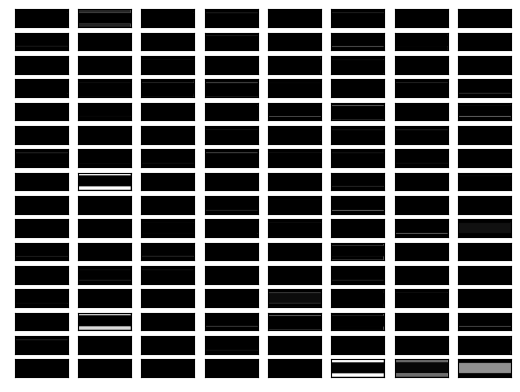

In [29]:
# plot all 64 maps in an 8x8 squares
from matplotlib import pyplot

nR = 16
nC = 8

ix = 1
for i in range(nR):
	for j in range(nC):
		# specify subplot and turn of axis
		ax = pyplot.subplot(nR, nC, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_0_6891521881_input (  [(None, 129, 384, 1)]    0         
 InputLayer)                                                     
                                                                 
 conv2d_0_6891521881 (Conv2D  (None, 129, 384, 128)    6400      
 )                                                               
                                                                 
Total params: 6,400
Trainable params: 6,400
Non-trainable params: 0
_________________________________________________________________
